# Computer Vision for Beginners

Image processing is performing some operations on images to get an intended manipulation. Think about what we do when we start a new data analysis. We do some data preprocessing and feature engineering. It’s the same with image processing. We do image processing to manipulate the pictures for extracting some useful information from them. We can reduce noises, control the brightness and color contrast. To learn detailed image processing fundamentals, visit [this video](https://www.youtube.com/watch?v=QMLbTEQJCaI).

OpenCV stands for Open Source Computer Vision library and it’s invented by Intel in 1999. It’s first written in C/C++ so you may see tutorials more in C languages than Python. But now it’s also getting commonly used in Python for computer vision as well. First things first, let’s set up a proper environment for using OpenCV. The installation can be processed as follows but you can also find the detailed description [here](https://pypi.org/project/opencv-python/).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap = None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = cmap)

# Color Models

The first step we’re going to do with OpenCV is importing an image and it can be done as follows.

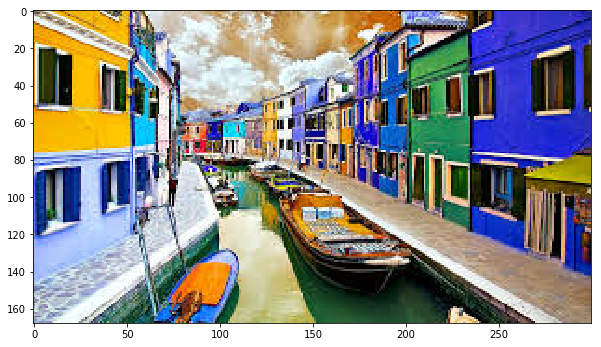

In [4]:
img = cv2.imread('burano.jpg')
display(img)

the default setting of the color mode in OpenCV comes in the order of BGR, which is different from that of Matplotlib. Therefore to see the image in RGB mode, we need to convert it from BGR to RGB as follows.

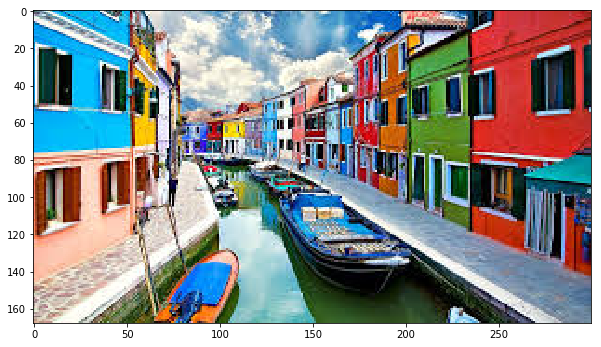

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img_rgb)

## More than just RGB

A color model is a system for creating a full range of colors using the primary colors. There are two different color models here: additive color models and subtractive color models. Additive models use light to represent colors in computer screens while subtractive models use inks to print those digital images on papers. The primary colors are red, green and blue (RGB) for the first one and cyan, magenta, yellow and black (CMYK) for the latter one. All the other colors we see on images are made by combining or mixing these primary colors. So the pictures can be depicted a little bit differently when they are represented in RGB and CMYK.

![img](https://cdn-images-1.medium.com/max/1500/1*CSmlQDizc03csCaSgMgMIw.png)

You would be pretty accustomed to these two kinds of models. In the world of color models, however, there are more than two kinds of models. Among them, grayscale, HSV and HLS are the ones you’re going to see quite often in computer vision.

A grayscale is simple. It represents images and morphologies by the intensity of black and white, which means it has only one channel. To see images in grayscale, we need to convert the color mode into gray just as what we did with the BGR image earlier.

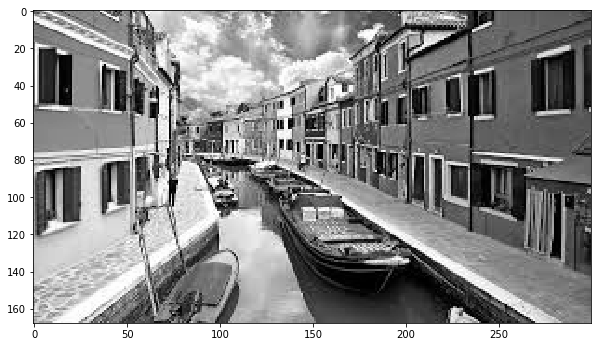

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(img_gray, cmap = 'gray')

RGB images are made up by stacking three channels: R, G, and B. So if we take each channel and depict them one by one, we can comprehend how the color channels are structured.

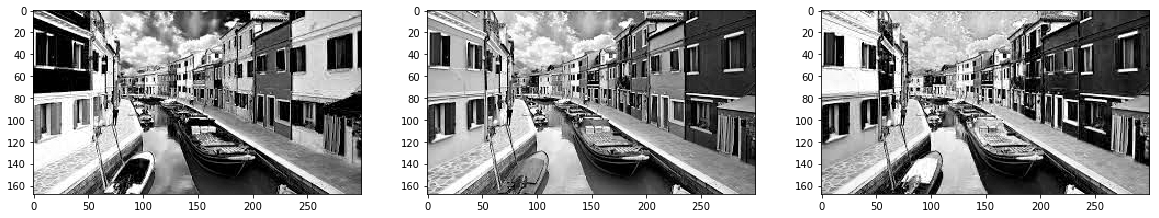

In [5]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))

for i in range(0, 3):
    ax = axs[i]
    ax.imshow(img_rgb[:, :, i], cmap = 'gray')
plt.show()

Take a look at the images above. The three images show you how each channel is composed of. In the R channel picture, the part with the high saturation of red colors looks white. Why is that? This is because the values in the red color parts will be near 255. And in grayscale mode, the higher the value is, the whiter the color becomes. You can also check this with G or B channels and compare how certain parts differ one from another.

# HSV and HSL models

HSV and HLS take a bit different aspect. As you can see above, they have a three-dimensional representation, and it’s more similar to the way of human perception. HSV stands for hue, saturation and value. HSL stands for hue, saturation and lightness. The center axis for HSV is the value of colors while that for HSL is the amount of light. Along the angles from the center axis, there is hue, the actual colors. And the distance from the center axis belongs to saturation. Transforming the color mode can be done as follows.

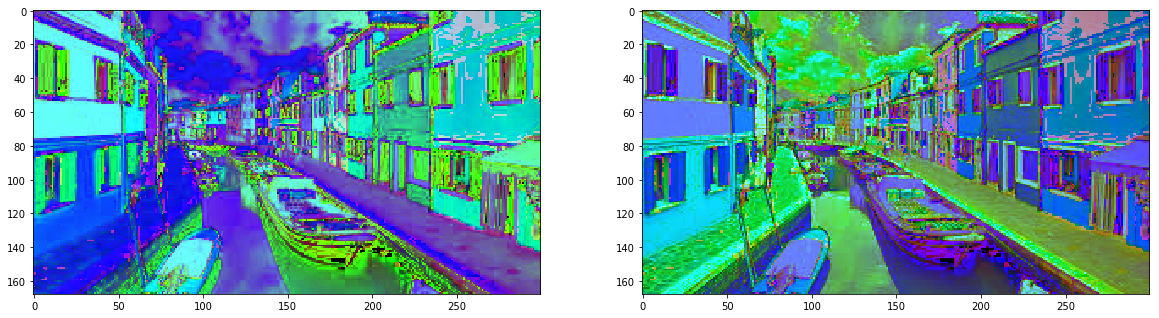

In [7]:
# Transform the image into HSV and HLS models
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

# Plot the converted images
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))
ax1.imshow(img_hsv)
ax2.imshow(img_hls)
plt.show()

# Drawing on images

Let’s bring some figures on the image. Now, we’re going to Paris. Have you ever heard of the wall of love? It’s a wall which is filled with the words “I love you” in all kinds of international languages. What we’re going to do is finding the words in our language and marking them with a rectangle. As I’m from South Korea, I’ll look up for ‘I love you’ in Korean. First, I’ll make a copy of the original image and then draw a rectangle with `cv2.rectangle()` We need to give the coordinates values for the upper left point and the lower right point.

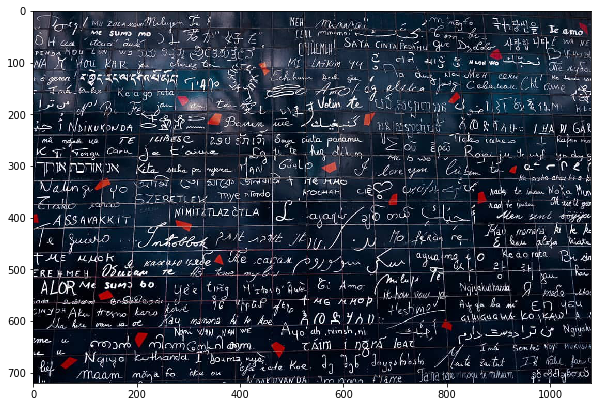

In [8]:
img = cv2.imread('wall.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

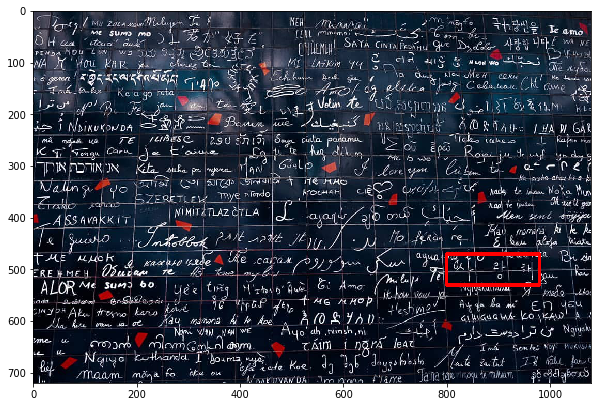

In [9]:
# Copy the image
img_copy = img.copy()

# Draw a rectangle 
cv2.rectangle(img_copy, pt1 = (800, 470), pt2 = (980, 530), color = (255, 0, 0), thickness = 5)
display(img_copy)

Great! I think I caught the right position. Let’s try again. I can see one more Korean word from the image so I’ll make a circle this time. With `cv2.circle()`, we need to specify the point of its center and the length of its radius.

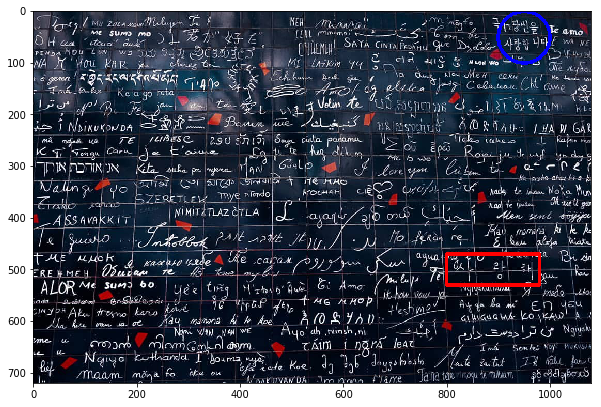

In [10]:
# Draw a circle 
cv2.circle(img_copy, center = (950, 50), radius = 50, color = (0, 0, 255), thickness = 5)
display(img_copy)

We can also put text data on the image. Why don’t we write the name of this wall this time? With `cv2.putText()`, we can designate the position and the font style and size of the text.

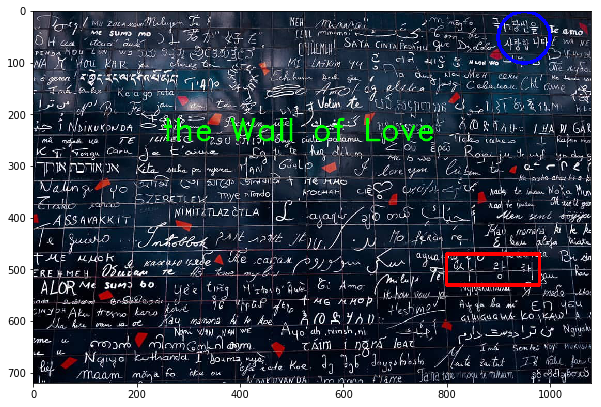

In [11]:
cv2.putText(img_copy, text = "the Wall of Love", org = (250, 250), fontFace = cv2.FONT_HERSHEY_DUPLEX,
            fontScale = 2, color = (0, 255, 0), thickness = 2, lineType = cv2.LINE_AA)
display(img_copy)

# More than images

Now we’ve been to Italy and France. Where would you like to go next? Why don’t we put a map and mark the places? We’re going to create a window and draw figures not by designating the points but by clicking directly on the window. Let’s try a circle first. We first create a function which will draw a circle with the data for the position and clicking of the mouse.

With `cv2.EVENT_LBUTTONDOWN` or `cv2.EVENT_RBUTTONDOWN`, we can bring the data for the position when we press the buttons of the mouse. The position of the mouse will be `(x, y)` and we’ll draw a circle whose center is at that point.

We’ll set a map as the background of the window and name the window as my_drawing. The name of the window can be anything, but it should be the same because this acts like the id of the window. Using the `cv2.setMouseCallback()`, we make a connection between the window and the function `draw_circle` we made at step 1.

Now we execute the window using while loop. Don’t forget to set the break unless you are making an infinite loop. The condition of the if clause is setting the window to be shut down when we press ESC on the keyboard. Save this as a file and import it on your terminal. If you’re to use jupyter lab, put the codes in one cell and execute. Now, tell me! Where do you want to go?

In [8]:
import cv2
import numpy as np


# Step 1. Define callback function
def draw_circle(event, x, y, flags, param):
    
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, center = (x, y), radius = 5, 
                   color = (87, 184, 237), thickness = -1)

    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, center = (x, y), radius = 10, 
                   color = (87, 184, 237), thickness = 1)
        
    
# Step 2. Call the window
img = cv2.imread('map.png')

cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_circle)


# Step 3. Execution 
while True: 
    cv2.imshow('my_drawing',img)
    if cv2.waitKey(10) & 0xFF == 27:
        break

cv2.destroyAllWindows()

Let’s try a rectangle. As a rectangle requires two points for pt1 and pt2 in `cv2.rectangle()`, we need an additional step to set the first click point as pt1 and the last point as pt2. And we’re going to detect the movement of the mouse with `cv2.EVENT_MOUSEMOVE` and `cv2.EVENT_LBUTTONUP`.

We first define `drawing = False` as a default. When the left button is pressed, `drawing` becomes true and we give that first position as pt1. If drawing is on, it’ll take the current point as pt2 and keep drawing rectangles while we move the mouse. It’s like overlapping the figures. When the left button is up, `drawing` becomes false and it takes the last position of the mouse as its final point of pt2.

In [2]:
import cv2
import numpy as np


# Step 1. Define callback function
drawing = False
ix = -1
iy = -1

def draw_rectangle(event, x, y, flags, params):
    
    global ix, iy, drawing
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img, pt1=(ix, iy), pt2=(x, y), 
                          color = (94, 196, 224), thickness = -1)
            
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, pt1=(ix, iy), pt2=(x, y), 
                     color = (94, 196, 224), thickness = -1)

        
# Step 2. Call the window
img = cv2.imread('map.png')

cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_rectangle)


# Step 3. Execution 
while True: 

    cv2.imshow('my_drawing',img)
    if cv2.waitKey(10) & 0xFF == 27:
        break

cv2.destroyAllWindows()

# Blurring

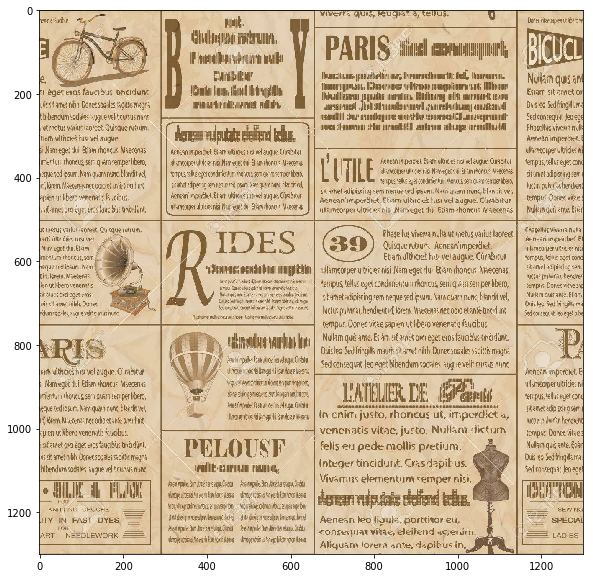

In [23]:
img = cv2.imread('text.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

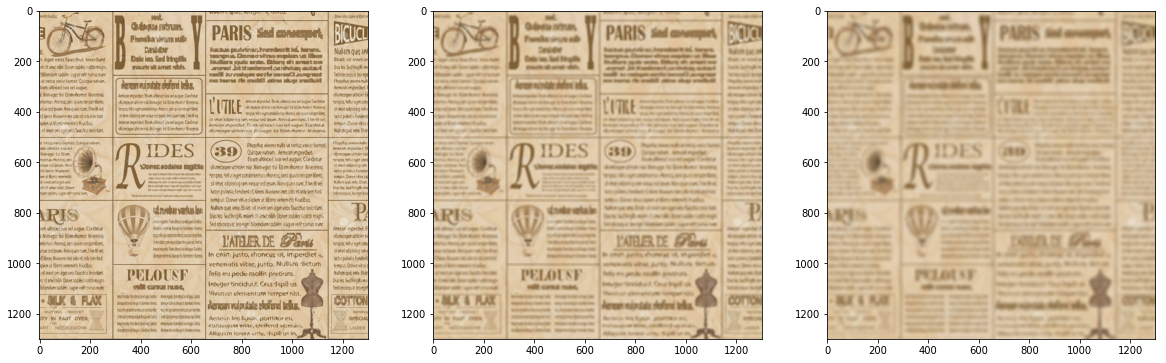

In [24]:
img = img.copy()
kernels = [5, 11, 17]

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))

for ind, s in enumerate(kernels):
    img = cv2.blur(img, ksize = (s, s))
    ax = axs[ind]
    ax.imshow(img)
plt.show()

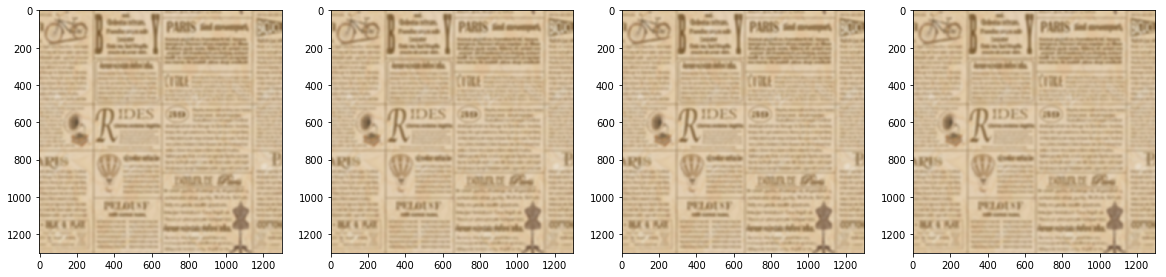

In [35]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 20))

img_0 = cv2.blur(img, ksize = (5, 5))
axs[0].imshow(img_0)
img_1 = cv2.GaussianBlur(img, ksize = (5, 5), sigmaX = 10)   
axs[1].imshow(img_1)
img_2 = cv2.medianBlur(img, 5)
axs[2].imshow(img_2)
img_3 = cv2.bilateralFilter(img, 9, 75, 75)
axs[3].imshow(img_3)